********Analysis of Vaccine Data from California Schools******** 

****A. Basic Statistics****
                   Statistic                                        Value
0          Number of schools                                           42
1   Total number of students                                         3833
2    Total number vaccinated                                         3428
3       Total not vaccinated                                          405
4               % vaccinated                                      89.4339
5  Hightest vaccination rate  RUBY BRIDGES ELEMENTARY had a rate of 100.0
6    Lowest vaccination rate     ANNA YATES ELEMENTARY had a rate of 50.0

****B. Schools ranked by % vaccination****


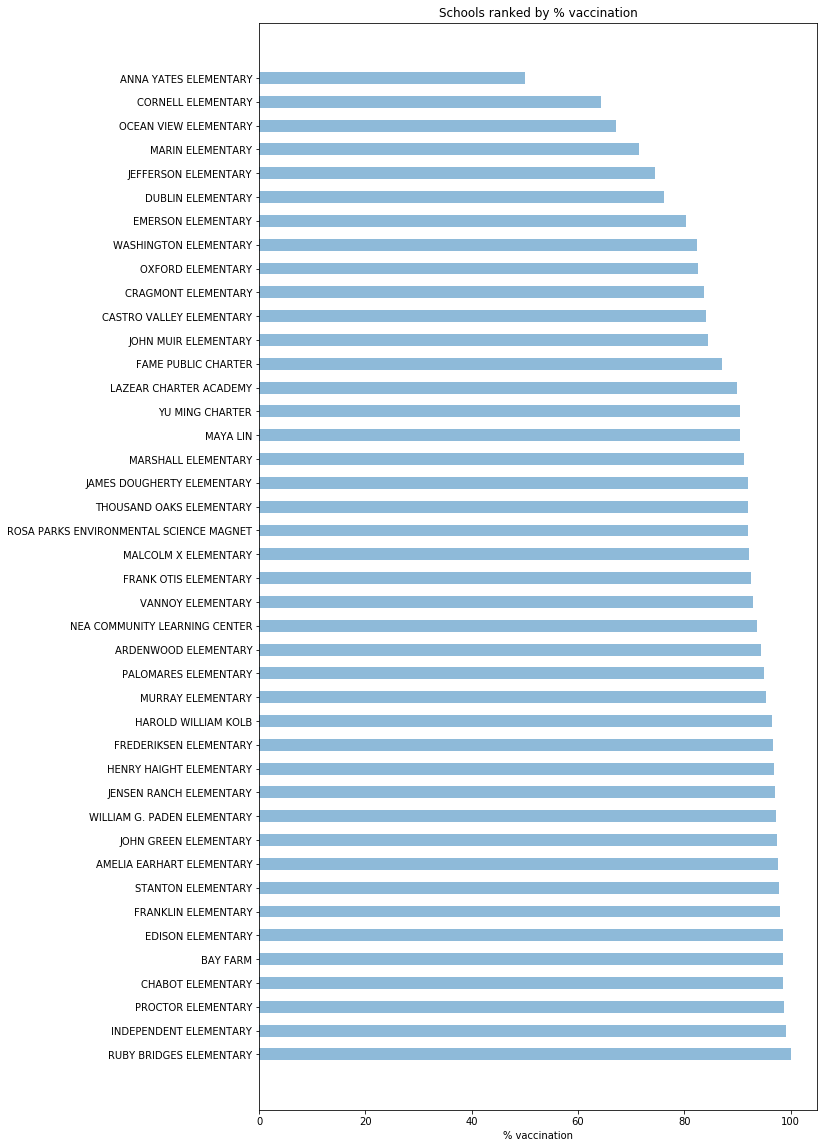


****C. Distribution of % vaccination****


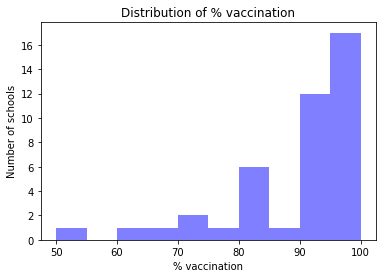

****D. Simulate Infection Rates****
probability that a student will interact with an infected student: 0.1
probability of infection if vaccinated: 0.1 
probability  of infection if NOT vaccinated: 0.9
Children without vaccination are 9.0 times more likely to get infected

****E. Results of the Simulation****
Overall, we expect 65 of the 3833 students to become infected
27 vaccinated students and 38 unvaccinated students
****Schools ranked by infection rate****


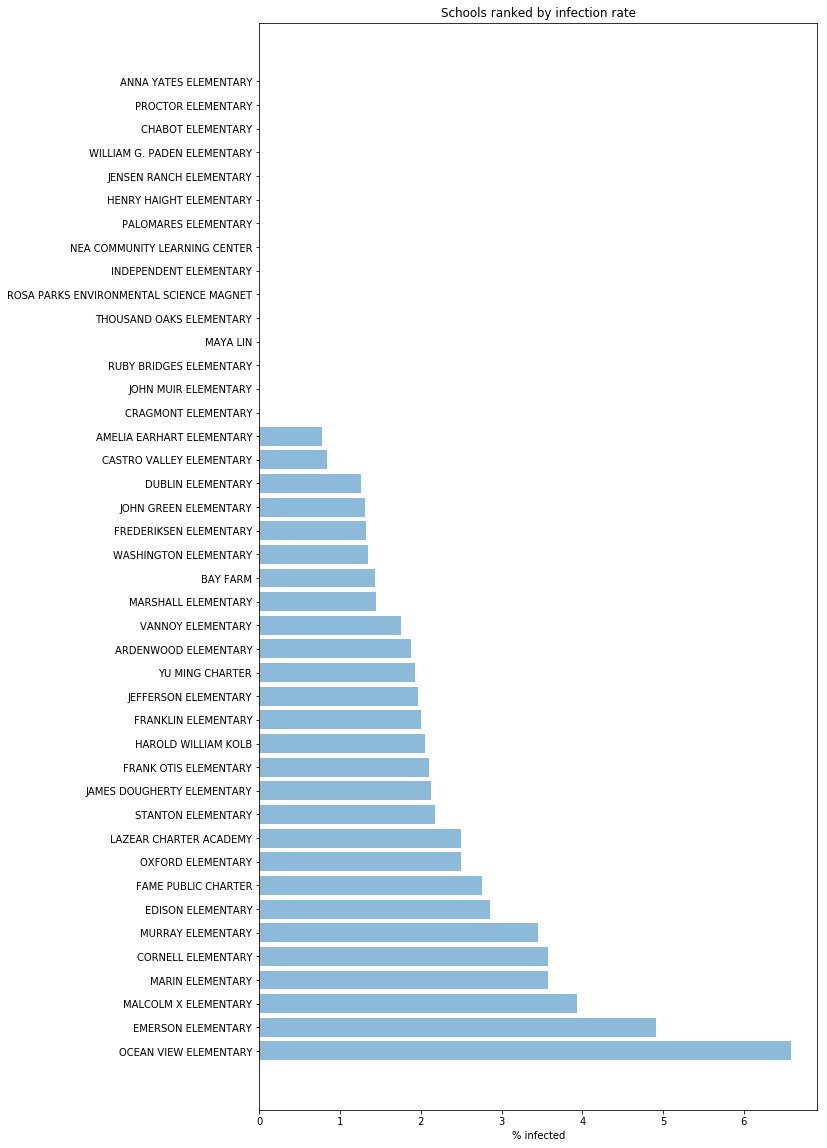


****Distribution of infection rates in individual schools****


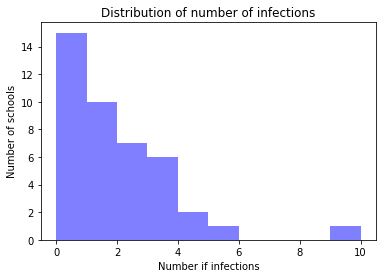


****F. Run Multiple Simulations of Total Number of Infections****

**Theoretical Value
There are  3428 vaccinated and 405 unvaccinated students
The theoretical number of infections is:

totVaccinated*probContact*probInfectionVaccinated
+
totNotVaccinated*probContact*probInfectionNotVaccinated
=
71

**Simulated Values
A simulation with 1000 trials yeilds this distribution of total infections


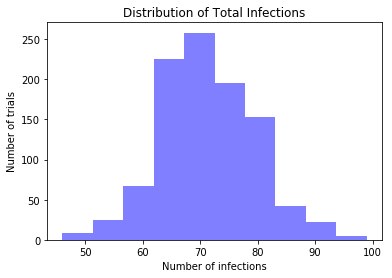


The simulation mean is 71.258
***Saved the full results table as vaccines_fullResults.csv


In [1]:
import pandas as pd
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
%matplotlib inline

#function to see if there is a hit given a probability
def rollTheProbabilityDice(probability):
    hit = False
    randomNumber = np.random.randint(1,1001,1)
    scaledProb = probability*1000
    if randomNumber <=scaledProb:
        hit=True
    return hit

#function to run a simulation of infection given a probability of contact and infection
def simulateInfection(probContact, probInfection, numStudents):
    numInfected = 0
    
    for j in range(0, numStudents):
       #was there contact?
        if rollTheProbabilityDice(probContact):
            #there was contact
            if rollTheProbabilityDice(probInfection):
                #there was an infection
                numInfected +=1
    return numInfected
            

print("********Analysis of Vaccine Data from California Schools******** ")
# read vaccination prepped table
vaccines = pd.read_csv('vaccines_prepped.csv')

#Add columns to the table for additional data
vaccines['Students Not Vaccinated'] = vaccines['Number of Students'] - vaccines['Students Vaccinated']
vaccines['Percent Vaccinated'] = vaccines['Students Vaccinated']/vaccines['Number of Students'] * 100
#print(vaccines)
    
#Describe the data set
print()
print("****A. Basic Statistics****")

numSchools = vaccines['School'].count()
totStudents = vaccines['Number of Students'].sum()
totVaccinated =  vaccines['Students Vaccinated'].sum()
totNotVaccinated =  vaccines['Students Not Vaccinated'].sum()
percentVaccinated = totVaccinated/totStudents * 100
maxPercentVaccination = vaccines['Percent Vaccinated'].max()
minPercentVaccination = vaccines['Percent Vaccinated'].min()
indexOfMaxVaccintion = vaccines['Percent Vaccinated'].idxmax()
indexOfMinVaccintion = vaccines['Percent Vaccinated'].idxmin()
schoolWithMaxPercent = vaccines.iat[indexOfMaxVaccintion,0]
schoolWithMinPercent = vaccines.iat[indexOfMinVaccintion,0]

basicStatsDict = {
    'Statistic': ["Number of schools",
                  "Total number of students", 
                  "Total number vaccinated",  
                  "Total not vaccinated",
                  "% vaccinated",
                  "Hightest vaccination rate",
                  "Lowest vaccination rate"
                 ],
    'Value': [numSchools, 
              totStudents, 
              totVaccinated, 
              totNotVaccinated,
              percentVaccinated,
              "{} had a rate of {}".format(schoolWithMaxPercent,maxPercentVaccination),
              "{} had a rate of {}".format(schoolWithMinPercent,minPercentVaccination)
             ]}

basicStatsTable = pd.DataFrame.from_dict(basicStatsDict)
print(basicStatsTable)


#Bar chart schools by % vaccination
print()
print("****B. Schools ranked by % vaccination****")

#Create bar chart
vaccines = vaccines.sort_values(by=['Percent Vaccinated'], ascending=[False])
plt.figure(figsize=(10,20))
plt.barh(vaccines['School'], vaccines['Percent Vaccinated'],.5,  align='center', alpha=0.5,)
plt.title('Schools ranked by % vaccination')

plt.xlabel("% vaccination")
plt.show()


print()
print("****C. Distribution of % vaccination****")
num_bins = 10
n, bins, patches = plt.hist(vaccines["Percent Vaccinated"], num_bins, facecolor='blue', alpha=0.5)
plt.title('Distribution of % vaccination')
plt.xlabel("% vaccination")
plt.ylabel("Number of schools")
plt.show()

print("****D. Simulate Infection Rates****")
#Set probabilies
probContact = 0.1
probInfectionVaccinated = 0.1
probInfectionNotVaccinated = 0.9
print("probability that a student will interact with an infected student: {}".format(probContact))
print("probability of infection if vaccinated: {} ".format(probInfectionVaccinated))
print("probability  of infection if NOT vaccinated: {}".format(probInfectionNotVaccinated))
print("Children without vaccination are {} times more likely to get infected".format(probInfectionNotVaccinated/probInfectionVaccinated))

#initialze infection number columns
vaccines['Infections in Vaccinated Students'] = "not yet calculated"
vaccines['Infections in Not Vaccinated Students'] = "not yet calculated"
vaccines['Infections in All Students'] = "not yet calculated"
vaccines['Percent of Students Infected'] = "not yet calculated"

#run experiment on each school
for i in vaccines.index:
        #run experiment for students that were vaccinated
        numStudentsVaccinated = vaccines.loc[i,'Students Vaccinated']
        numVaccinatedGotInfected = simulateInfection(probContact, probInfectionVaccinated, numStudentsVaccinated )
        #run experiment for students that were NOT vaccinated
        numStudentsNotVaccinated = vaccines.loc[i,'Students Not Vaccinated']
        numNotVaccinatedGotInfected = simulateInfection(probContact, probInfectionNotVaccinated, numStudentsNotVaccinated)
       
        #add results to the vaccines table
        totalInfections = numVaccinatedGotInfected + numNotVaccinatedGotInfected
        percentInfection = totalInfections/vaccines.loc[i,'Number of Students'] * 100
        vaccines.loc[i,'Infections in Vaccinated Students'] = numVaccinatedGotInfected
        vaccines.loc[i,'Infections in Not Vaccinated Students'] = numNotVaccinatedGotInfected
        vaccines.loc[i,'Infections in All Students'] = totalInfections
        vaccines.loc[i,'Percent of Students Infected'] = percentInfection
       

#Show the results
totalInfections = vaccines['Infections in All Students'].sum()
vaccinatedInfections = vaccines['Infections in Vaccinated Students'].sum()
notVaccinatedInfections = vaccines['Infections in Not Vaccinated Students'].sum()
print()
print("****E. Results of the Simulation****")
print("Overall, we expect {} of the {} students to become infected".format(totalInfections,totStudents))
print("{} vaccinated students and {} unvaccinated students".format(vaccinatedInfections, notVaccinatedInfections))

#Create bar chart
print("****Schools ranked by infection rate****")
vaccines = vaccines.sort_values(by=['Percent of Students Infected'], ascending=[False])
plt.figure(figsize=(10,20))
plt.barh(vaccines['School'], vaccines['Percent of Students Infected'],  align='center', alpha=0.5)
plt.title('Schools ranked by infection rate')
plt.xlabel("% infected")
plt.show()


print()
print("****Distribution of infection rates in individual schools****")
n, bins, patches = plt.hist(vaccines["Infections in All Students"], num_bins, facecolor='blue', alpha=0.5)
plt.title('Distribution of number of infections')
plt.xlabel("Number if infections")
plt.ylabel("Number of schools")
plt.show()

print()
print("****F. Run Multiple Simulations of Total Number of Infections****")
print()
print("**Theoretical Value")
print("There are  {} vaccinated and {} unvaccinated students".format(totVaccinated,totNotVaccinated))
print("The theoretical number of infections is:")
print()
print("totVaccinated*probContact*probInfectionVaccinated")
print("+")
print("totNotVaccinated*probContact*probInfectionNotVaccinated")
print("=")
theoreticalNumInfections = totVaccinated*probContact*probInfectionVaccinated + totNotVaccinated*probContact*probInfectionNotVaccinated
print("{:0.0f}".format(theoreticalNumInfections))
print()
print("**Simulated Values")
numRuns = 1000
dict = {
        "trial":np.arange(1,numRuns+1,1),
        "result":"not yet run",         
        }
experimentTable = pd.DataFrame(dict)
for i in range (0, numRuns):
    infections = simulateInfection(probContact, probInfectionVaccinated, totVaccinated)
    infections += simulateInfection(probContact, probInfectionNotVaccinated, totNotVaccinated)
    experimentTable.loc[i,'result'] = infections

print("A simulation with {} trials yeilds this distribution of total infections".format(numRuns))
num_bins = 10
n, bins, patches = plt.hist(experimentTable["result"], num_bins, facecolor='blue', alpha=0.5)
plt.title('Distribution of Total Infections')
plt.xlabel("Number of infections")
plt.ylabel("Number of trials")
plt.show()
print()
print("The simulation mean is {}".format(experimentTable['result'].mean()))

fullResultsFileName = "vaccines_fullResults.csv"
print("***Saved the full results table as {}".format(fullResultsFileName))    
vaccines.to_csv(fullResultsFileName, index=False)

#print(experimentTable)
